# Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/chekirou/International-conflict-prediction/master/data/actual.csv'

In [2]:
df = pd.read_csv(url)

In [3]:
csv1 = pd.read_csv('../raw_data/csv1.csv')
csv2 = pd.read_csv('../raw_data/csv2.csv')
csv3 = pd.read_csv('../raw_data/csv3.csv')
csv4 = pd.read_csv('../raw_data/csv4.csv')
csv5 = pd.read_csv('../raw_data/csv5.csv')
csv6 = pd.read_csv('../raw_data/csv6.csv')

In [4]:
csv1['CountryYear'] = csv1['Country']+csv1['Year'].astype(str)
csv2['CountryYear'] = csv2['Country']+csv2['Year'].astype(str)
csv3['CountryYear'] = csv3['Country']+csv3['Year'].astype(str)
csv4['CountryYear'] = csv4['Country']+csv4['Year'].astype(str)
csv5['CountryYear'] = csv5['Country']+csv5['Year'].astype(str)
csv6['CountryYear'] = csv6['Country']+csv6['Year'].astype(str)

In [5]:
csv_12 = pd.merge(csv1,csv2,on='CountryYear',how='outer')
csv_123 = pd.merge(csv_12,csv3,on='CountryYear',how='outer')
csv_1234 = pd.merge(csv_123,csv4,on='CountryYear',how='outer')
csv_12345 = pd.merge(csv_1234,csv5,on='CountryYear',how='outer')
csv_full = pd.merge(csv_12345,csv6,on='CountryYear',how='outer')

csv_full

/var/folders/_s/vshzgsh90qdgm6zwx2gfmpv80000gn/T/ipykernel_16234/3997445115.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Code_x', 'ContinentCode_x', 'Country_x', 'Year_x'} in the result is deprecated and will raise a MergeError in a future version.
  csv_1234 = pd.merge(csv_123,csv4,on='CountryYear',how='outer')
/var/folders/_s/vshzgsh90qdgm6zwx2gfmpv80000gn/T/ipykernel_16234/3997445115.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Code_x', 'ContinentCode_x', 'Country_x', 'Year_x'} in the result is deprecated and will raise a MergeError in a future version.
  csv_full = pd.merge(csv_12345,csv6,on='CountryYear',how='outer')


,Country_x,Code_x,ContinentCode_x,Year_x,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Cost of living index world average = 100,Food price index world average = 100,Housing and utilities price index world average = 100,Healthcare price index world average = 100,...,Security threats index 0 (low) - 10 (high),Factionalized elites index 0 (low) - 10 (high),Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high)
0,Afghanistan,AFG,AS,1960.0,NaN,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,AS,1961.0,NaN,56.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,AS,1962.0,NaN,64.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,AS,1963.0,NaN,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,AS,1964.0,NaN,56.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
csv_full.isna().sum()

Country_x                                                   3796
Code_x                                                      3796
ContinentCode_x                                             4716
Year_x                                                      3796
Military spending percent of total government spending      8431
                                                            ... 
State legitimacy index 0 (high) - 10 (low)                  9751
Human rights and rule of law index 0 (high) - 10 (low)      9750
Demographic pressures 0 (low) - 10 (high)                   9750
Refugees and displaced persons index 0 (low) - 10 (high)    9750
External interventions index 0 (low) - 10 (high)            9750
Length: 114, dtype: int64

In [7]:
conflicts = pd.read_csv('../raw_data/conflict_data/conflict_data_1970.csv')

In [8]:
def get_year(row):
    
    year_value = row['CountryYear'][-4:]
    
    return int(year_value)

In [9]:
def get_country(row):
    
    country_name = row['CountryYear'][:-4]

    return country_name

In [10]:
def get_code(row):
    
    code_value = row['CountryYear'][-4:]
    
    return int(year_value)

In [11]:
csv_full['year_all'] = csv_full.apply(lambda x: get_year(x),axis=1)

In [12]:
csv_full['country_all'] = csv_full.apply(lambda x: get_country(x), axis=1)

# DELETING TINY PROVINCES/STATES

In [13]:
tiny_countries = ['Andorra','Antigua and Barbuda','Aruba','Belize','Bhutan','Brunei','Cape Verde','Comoros','Dominica','Kiribati',
                 'Micronesia','Montserrat','Palau','Saint Vincent and the Grenadines','Sao Tome and Principe','Solomon Islands','Taiwan',
                  'Tuvalu','Vanuatu','Euro area','Faroe Islands','Gibraltar','Macao','New Caledonia','San Marino','Norfolk Island','Holy See (Vatican City)']
csv_full = csv_full.set_index('country_all').drop(tiny_countries)
csv_full.reset_index(inplace=True)
csv_full[csv_full['country_all']=='Syria']


,country_all,Country_x,Code_x,ContinentCode_x,Year_x,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Cost of living index world average = 100,Food price index world average = 100,Housing and utilities price index world average = 100,...,Factionalized elites index 0 (low) - 10 (high),Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),year_all
7293,Syria,Syria,SYR,AS,1960.0,NaN,37.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960
7294,Syria,Syria,SYR,AS,1961.0,NaN,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1961
7295,Syria,Syria,SYR,AS,1962.0,NaN,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962
7296,Syria,Syria,SYR,AS,1963.0,NaN,74.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1963
7297,Syria,Syria,SYR,AS,1964.0,NaN,50.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7351,Syria,Syria,SYR,AS,2018.0,NaN,181.0,NaN,NaN,NaN,...,9.9,9.9,8.5,7.8,9.9,9.9,8.2,10.0,10.0,2018
7352,Syria,Syria,SYR,AS,2019.0,NaN,NaN,NaN,NaN,NaN,...,9.9,10.0,8.8,7.5,9.9,10.0,7.9,10.0,10.0,2019
7353,Syria,Syria,SYR,AS,2020.0,NaN,72.0,NaN,NaN,NaN,...,9.9,10.0,8.7,7.2,10.0,10.0,7.6,10.0,10.0,2020
9901,Syria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.9,9.7,9.6,7.1,10.0,9.7,7.6,9.7,10.0,2021


In [14]:
csv_full['conflict_id'] =0
conflicts

csv_full[(csv_full['country_all']=='USA') & (csv_full['year_all']>1994)]

conflicts_1990 = conflicts[conflicts['Year']>1989]

In [15]:
my_list = []

def get_hist_data(country,year,lookback):
    
    early_year = lookback
    hist_data = csv_full[(csv_full['country_all']==country) & (csv_full['year_all'] <= (year -1)) & (csv_full['year_all'] > (year -1 - early_year))]
    while hist_data.shape[0] < lookback:
        early_year += 1
        
        hist_data = csv_full[(csv_full['country_all']==country) & (csv_full['year_all'] <= (year -1)) & (csv_full['year_all'] > (year -1 - early_year))]
    return hist_data

for index, row in conflicts_1990.iterrows():

    my_list.append(get_hist_data(row['Country'],row['Year'],5))


get_hist_data('USA',2010,10)    
    
len(my_list)
    

94

In [16]:
for i in range(len(my_list)):
    my_list[i]['conflict_id'] = i

/var/folders/_s/vshzgsh90qdgm6zwx2gfmpv80000gn/T/ipykernel_16234/729059741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_list[i]['conflict_id'] = i


In [17]:
for i in range(len(my_list)):
    if len(my_list[i]) < 5:
        print(i)

In [18]:
final_df = pd.DataFrame(columns=my_list[50].columns)

In [19]:
final_df

,country_all,Country_x,Code_x,ContinentCode_x,Year_x,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Cost of living index world average = 100,Food price index world average = 100,Housing and utilities price index world average = 100,...,Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),year_all,conflict_id


In [20]:
for i in range(len(my_list)):
    
    final_df = pd.concat([final_df,my_list[i]])

In [21]:
final_df.shape

(470, 117)

In [22]:
final_df

,country_all,Country_x,Code_x,ContinentCode_x,Year_x,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Cost of living index world average = 100,Food price index world average = 100,Housing and utilities price index world average = 100,...,Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),year_all,conflict_id
6348,Rwanda,Rwanda,RWA,AF,1985.0,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985,0
6349,Rwanda,Rwanda,RWA,AF,1986.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986,0
6350,Rwanda,Rwanda,RWA,AF,1988.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988,0
9657,Rwanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987,0
9658,Rwanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3938,Kazakhstan,Kazakhstan,KAZ,AS,2017.0,3.45,214.0,55.08,70.57,63.413,...,7.6,6.4,4.2,8.3,7.3,4.5,3.0,4.2,2017,93
3939,Kazakhstan,Kazakhstan,KAZ,AS,2018.0,4.65,310.0,NaN,NaN,NaN,...,7.9,5.9,3.9,8.4,7.0,4.2,2.7,3.9,2018,93
3940,Kazakhstan,Kazakhstan,KAZ,AS,2019.0,5.25,312.0,NaN,NaN,NaN,...,8.1,5.6,3.6,8.5,6.7,3.9,2.4,3.6,2019,93
3941,Kazakhstan,Kazakhstan,KAZ,AS,2020.0,4.56,268.0,NaN,NaN,NaN,...,8.2,5.3,3.3,8.5,6.4,3.6,2.3,3.3,2020,93


# Dropping features

In [23]:
final_df.shape

(470, 117)

In [24]:
to_drop  = pd.DataFrame(final_df.isna().sum()/470)
len(to_drop)

117

In [25]:
to_drop_list = to_drop[to_drop[0]>0.7].index.values.tolist()
len(to_drop_list)

26

In [26]:
for i in to_drop_list:
    final_df.drop(columns=i, axis=1, inplace=True)

In [27]:
final_df['CountryYear']

6348        Rwanda1985
6349        Rwanda1986
6350        Rwanda1988
9657        Rwanda1987
9658        Rwanda1989
             ...      
3938    Kazakhstan2017
3939    Kazakhstan2018
3940    Kazakhstan2019
3941    Kazakhstan2020
3942    Kazakhstan2021
Name: CountryYear, Length: 470, dtype: object

# Dropping data for the imputer

In [28]:
bin_list = ['Country_x','Code_x','Country_y','Year_x','Year_y','Code_y','ContinentCode_y','ContinentCode_x','Christians as percent of the total population']
final_df.head()

,country_all,Country_x,Code_x,ContinentCode_x,Year_x,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),CountryYear,Country_y,...,Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),year_all,conflict_id
6348,Rwanda,Rwanda,RWA,AF,1985.0,NaN,3.0,NaN,Rwanda1985,Rwanda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985,0
6349,Rwanda,Rwanda,RWA,AF,1986.0,NaN,2.0,NaN,Rwanda1986,Rwanda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986,0
6350,Rwanda,Rwanda,RWA,AF,1988.0,NaN,2.0,NaN,Rwanda1988,Rwanda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988,0
9657,Rwanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rwanda1987,Rwanda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987,0
9658,Rwanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rwanda1989,Rwanda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,0


In [29]:
cleaner_df = final_df.drop(columns=bin_list)

In [30]:
cleaner_df['conflict_id']=cleaner_df['conflict_id'].astype(int)

In [31]:
cleaner_df

,country_all,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),CountryYear,Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,Capital investment as percent of GDP,Inflation: percent change in the Consumer Price Index,...,Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),year_all,conflict_id
6348,Rwanda,NaN,3.0,NaN,Rwanda1985,4.40,279.10,NaN,17.31,1.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985,0
6349,Rwanda,NaN,2.0,NaN,Rwanda1986,5.47,301.80,NaN,15.87,-1.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986,0
6350,Rwanda,NaN,2.0,NaN,Rwanda1988,4.50,337.96,NaN,14.49,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988,0
9657,Rwanda,NaN,NaN,NaN,Rwanda1987,-0.02,318.21,NaN,15.66,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987,0
9658,Rwanda,NaN,NaN,NaN,Rwanda1989,-0.04,330.50,NaN,13.43,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3938,Kazakhstan,3.45,214.0,0.813,Kazakhstan2017,4.10,9247.58,24862.97,26.35,7.4,...,7.6,6.4,4.2,8.3,7.3,4.5,3.0,4.2,2017,93
3939,Kazakhstan,4.65,310.0,0.817,Kazakhstan2018,4.10,9812.63,25544.35,25.26,6.0,...,7.9,5.9,3.9,8.4,7.0,4.2,2.7,3.9,2018,93
3940,Kazakhstan,5.25,312.0,0.817,Kazakhstan2019,4.50,9812.60,26351.80,27.63,5.2,...,8.1,5.6,3.6,8.5,6.7,3.9,2.4,3.6,2019,93
3941,Kazakhstan,4.56,268.0,0.825,Kazakhstan2020,-2.50,9121.64,25361.51,28.52,6.7,...,8.2,5.3,3.3,8.5,6.4,3.6,2.3,3.3,2020,93


# Grouping the data


In [32]:
grouped_df = cleaner_df.groupby(by='conflict_id').mean()

/var/folders/_s/vshzgsh90qdgm6zwx2gfmpv80000gn/T/ipykernel_16234/2490057627.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = cleaner_df.groupby(by='conflict_id').mean()


In [33]:
grouped_df.columns

Index(['Military spending percent of total government spending ',
       'Arms imports million constant U.S. dollars',
       'Human Development Index (0 - 1)',
       'Economic growth: the rate of change of real GDP',
       'GDP per capita current U.S. dollars',
       'GDP per capita Purchasing Power Parity',
       'Capital investment as percent of GDP',
       'Inflation: percent change in the Consumer Price Index',
       'Unemployment rate', 'Youth unemployment ages 15-24',
       'Labor force participation rate',
       'Trade openness: exports plus imports as percent of GDP',
       'Foreign Direct Investment percent of GDP',
       'Trade balance as percent of GDP',
       'External debt percent of Gross National Income',
       'Government spending as percent of GDP',
       'Fiscal balance percent of GDP', 'Government debt as percent of GDP',
       'Foreign aid and official development assistance received',
       'Rule of law index (-2.5 weak; 2.5 strong)',
       'Govern

# Create the control dataset

In [34]:
conflict_years = final_df['CountryYear']

In [35]:
csv4_after_1980 = csv_full[csv_full['year_all'] > 1985]
csv4_after_1980_noconflict = csv4_after_1980[csv4_after_1980.CountryYear.isin(conflict_years)==False]
csv4_after_1980.shape[0] - csv4_after_1980_noconflict.shape[0]

437

In [36]:
def slice_fn(sample):
    year = int(sample[-4:])
    words = [sample[:-4]+str(year-i-1) for i in range(4)]
    words.append(sample)
    return words

In [37]:
from itertools import chain

sample_list = []

control_sample = csv4_after_1980.sample(270,random_state=17)

for index,row in control_sample.iterrows():
    sample_list.append(get_hist_data(row['country_all'],row['year_all'],5))

sample_full = sample_list[0]

for i in range(1,len(sample_list)):
    
    sample_full = pd.concat([sample_full,sample_list[i]])

In [38]:
id_list = list(range(95,365))*5

In [39]:
id_list = sorted(id_list)

In [40]:
sample_full['conflict_id'] = id_list
sample_full['country_all'].unique()

array(['Ghana', 'Russia', 'Nicaragua', 'Panama', 'Moldova',
       'Turkmenistan', 'Tanzania', 'Oman', 'Monaco', 'Saudi Arabia',
       'Cuba', 'Syria', 'Tajikistan', 'Haiti', 'Georgia', 'Eritrea',
       'El Salvador', 'Malawi', 'Iran', 'Croatia',
       'Central African Republic', 'Liechtenstein', 'Singapore',
       'Switzerland', 'Iceland', 'Libya', 'South Korea', 'Burkina Faso',
       'Thailand', 'Canada', 'Uruguay', 'USA', 'Uganda', 'Guyana',
       'Bulgaria', 'South Africa', 'Nigeria', 'Guinea', 'Sri Lanka',
       'Somalia', 'Paraguay', 'Finland', 'New Zealand', 'Sudan',
       'Grenada', 'Trinidad and Tobago', 'Ivory Coast', 'Albania',
       'Argentina', 'Bolivia', 'Iraq', 'Lesotho', 'Czechia', 'Slovakia',
       'Togo', 'Ethiopia', 'Barbados', 'Mozambique', 'Mali',
       'Puerto Rico', 'Estonia', 'Greece', 'Djibouti', 'Portugal',
       'Saint Lucia', 'Rwanda', 'Algeria', 'Suriname', 'Fiji', 'Gambia',
       'Romania', 'Jordan', 'Lebanon', 'Liberia', 'Samoa', 'Armenia',
 

In [41]:
control_groupedby = sample_full.groupby('conflict_id').mean()

/var/folders/_s/vshzgsh90qdgm6zwx2gfmpv80000gn/T/ipykernel_16234/3478027142.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  control_groupedby = sample_full.groupby('conflict_id').mean()


In [42]:
columns_to_keep = list(grouped_df.columns)

In [43]:
sample_full_clean = control_groupedby.drop(columns=[col for col in control_groupedby if col not in columns_to_keep])

sample_full_clean.isna().sum()

sample_full_clean

,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,Capital investment as percent of GDP,Inflation: percent change in the Consumer Price Index,Unemployment rate,Youth unemployment ages 15-24,...,Security threats index 0 (low) - 10 (high),Factionalized elites index 0 (low) - 10 (high),Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high)
conflict_id,,,,,,,,,,,,,,,,,,,,,
95,1.974,11.400000,0.5082,5.490,654.486,3172.354,23.730,17.120,5.850,10.5680,...,2.40,3.50,5.1,4.00,6.8,5.50,4.50,6.0,4.50,4.70
96,11.248,NaN,0.7396,6.140,3375.766,17559.266,20.764,14.920,7.990,16.7400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,81.400000,NaN,0.700,757.220,NaN,22.044,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,2.514,12.000000,0.7124,4.202,3981.062,14162.368,36.418,0.980,3.798,8.4680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,2.200,6.666667,0.6174,NaN,593.770,5696.160,24.880,789.175,4.080,8.1900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,NaN,NaN,NaN,2.570,1349.700,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,NaN,8.000000,0.4106,6.126,260.390,2068.640,NaN,14.400,2.515,5.8825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,NaN,292.600000,NaN,0.894,920.218,NaN,25.682,105.420,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# sample_full_clean

# sara_conflict = pd.read_csv('imputed_final_df.csv',index_col=0)
# sara_control = pd.read_csv('imputed_control.csv')


# test_sara_conflict_ali_control = pd.concat([sara_conflict,imputed_control_df])
# test_sara_control_ali_conflict = pd.concat([imputed_conflict_df,sara_control])

# Merging dataset and imputing all


In [45]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0, missing_values=np.nan)
imputer2 = IterativeImputer(max_iter=10, random_state=0, missing_values=np.nan)

grouped_df['target'] = 1
sample_full_clean['target'] = 0

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']


full_dataset = pd.concat([grouped_df,sample_full_clean])

In [46]:
data_numeric = full_dataset.select_dtypes(include=numerics)

imputer.fit(data_numeric)
imputed_final_df = pd.DataFrame(imputer.transform(data_numeric),columns=full_dataset.columns)
imputed_final_df.head()

,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,Capital investment as percent of GDP,Inflation: percent change in the Consumer Price Index,Unemployment rate,Youth unemployment ages 15-24,...,Factionalized elites index 0 (low) - 10 (high),Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),target
0,13.185423,2.333333,0.313883,2.862,313.514,-487.983289,15.352,1.760000,9.448157,15.740242,...,7.958384,6.872342,9.021604,8.787900,8.188606,8.197759,9.930683,7.901476,9.416299,1.0
1,10.417587,16.000000,0.368442,3.200,823.864,514.534596,13.258,2.740000,8.210534,14.454135,...,6.243517,6.686893,7.985533,8.413091,6.418408,6.283875,8.825800,7.201645,8.347415,1.0
2,10.390000,122.200000,0.324370,3.308,257.922,-1733.655062,15.868,7.766667,6.008057,9.736441,...,7.553015,7.712628,8.477795,8.982028,7.340504,7.375549,9.641749,8.237948,9.133387,1.0
3,12.104872,2.000000,0.323407,4.888,174.638,-1563.447237,21.562,11.140000,6.880625,9.862476,...,7.216577,7.232755,8.635054,8.533383,7.248141,6.890993,9.334049,7.388070,8.896332,1.0
4,8.400753,-179.619362,0.637688,-4.666,1614.640,11135.460000,29.614,194.007448,6.074756,12.093205,...,4.378764,5.394012,5.734092,6.803348,5.313595,5.148599,5.870761,4.881933,5.708015,1.0


In [47]:
#  data_numeric2 = grouped_df.select_dtypes(include=numerics)

# imputed_conflict_df = pd.DataFrame(imputer2.fit_transform(data_numeric2),columns=data_numeric2.columns)
# imputed_control_df = pd.DataFrame(imputer2.fit_transform(sample_full_clean),columns=data_numeric2.columns)

In [48]:
# imputed_control_df

In [49]:
# separate_impute_full_df = pd.concat([imputed_control_df,imputed_conflict_df])
# separate_impute_full_df['target'] = separate_impute_full_df['target'].astype(int)
# separate_impute_full_df
# imputed_final_df

In [50]:
# scaler2 = MinMaxScaler()
# separate_scaled = pd.DataFrame(scaler2.fit_transform(separate_impute_full_df), columns=separate_impute_full_df.columns)

# X2 = separate_scaled.drop(columns=['target'])
# y2 = separate_scaled['target']
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2,test_size = 0.3, random_state=5)



In [51]:
# bst2 = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# bst2.fit(X_train2, y_train2)

In [52]:
# preds2 = bst2.predict(X_test2)

# accuracy_score(preds2,y_test2)

In [53]:
# print(imputed_final_df.shape)
# imputed_final_df.columns

imputed_final_df.describe()

,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,Capital investment as percent of GDP,Inflation: percent change in the Consumer Price Index,Unemployment rate,Youth unemployment ages 15-24,...,Factionalized elites index 0 (low) - 10 (high),Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),target
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,...,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,9.670789,180.163543,0.621018,3.650324,8166.462268,14893.704813,23.812569,104.294644,8.924473,18.121171,...,5.800337,5.619907,5.995661,6.580113,6.252673,6.271083,6.464602,5.357250,6.164389,0.258242
std,6.837198,456.046436,0.180494,2.948601,15311.620202,18842.193578,9.343364,583.601178,6.275088,12.436031,...,4.384169,3.698048,2.095382,2.859616,3.709161,2.300283,3.302593,3.038900,2.949643,0.438270
min,0.000000,-2269.080145,0.181213,-7.118000,117.286000,-5350.176914,0.000000,-837.865337,0.350000,0.513333,...,-35.542227,-25.877700,-4.335616,-19.836180,-26.400836,-3.282851,-23.282234,-15.441678,-11.747040,0.000000
25%,4.579670,6.666667,0.474700,1.974500,823.600500,3919.152000,18.608500,2.790000,4.247000,8.956500,...,4.448726,4.560242,4.826112,5.917663,5.183555,4.625421,5.536938,4.195000,4.866314,0.000000
50%,8.163000,48.000000,0.655500,3.576056,2933.038000,9740.485000,22.959000,6.325000,7.852965,15.823833,...,6.525818,6.053333,6.236650,7.203231,6.941490,6.776029,6.914083,5.630563,6.550001,0.000000
75%,12.653381,229.026540,0.759250,5.221000,8042.325000,18684.768223,27.054589,14.923333,11.319548,23.119500,...,7.919813,7.362306,7.541670,8.008992,7.939407,8.061830,8.219191,6.927047,7.969830,1.000000
max,40.677016,3701.400000,1.050399,14.046667,159062.786000,184269.871875,124.495316,6517.100000,37.276000,67.156000,...,17.822863,10.501266,10.424608,11.564903,26.861064,12.390925,13.561144,10.086843,12.773872,1.000000


# Scaler on whole dataset

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler()
full_dataset_scaled = pd.DataFrame(scaler.fit_transform(imputed_final_df), columns=imputed_final_df.columns)



# LET'S MODEL

In [56]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


X = full_dataset_scaled.drop(columns=['target'])
y = full_dataset_scaled['target']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=5)

In [57]:
y_train.value_counts()

0.0    191
1.0     63
Name: target, dtype: int64

In [58]:
bst = XGBClassifier(n_estimators=100,max_depth=30,learning_rate=1, 
                    objective='binary:logistic')

In [59]:
bst.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=30, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [60]:
preds = bst.predict(X_test)

accuracy_score(preds,y_test)
bst.predict_proba(X_test)
accuracy_score(preds,y_test)


0.6727272727272727

In [61]:
import pandas as pd

features = bst.get_booster().feature_names
importances = bst.feature_importances_
feature_importances_df = pd.DataFrame(zip(features, importances), columns=['feature', 'importance']).set_index('feature')
feature_importances_df.sort_values('importance', ascending=False).head(10)





,importance
feature,
Death rate per 1000 people,0.116672
Factionalized elites index 0 (low) - 10 (high),0.076274
Rule of law index (-2.5 weak; 2.5 strong),0.074945
Food production index (2004-2006 = 100),0.054030
Suicide mortality rate per 100000 population,0.049071
Labor force participation rate,0.041989
Human rights and rule of law index 0 (high) - 10 (low),0.037293
Uneven economic development index 0 (low) - 10 (high),0.037204
Trade openness: exports plus imports as percent of GDP,0.036522


In [62]:
def get_imputed_df(country,year,lookback=5):
    df = get_hist_data(country,year,lookback).groupby('country_all').mean(numeric_only=True)
    df.drop(columns=[col for col in df if col not in columns_to_keep],inplace=True)
    df['target'] = 0.5
    imputed_df = pd.DataFrame(imputer.transform(df),columns=df.columns)
    imputed_df.drop(columns='target',inplace=True)
    
    
    return imputed_df




def get_prob(country,year,lookback=5):
    
    prob = bst.predict_proba(get_imputed_df(country,year,lookback))[0][1]
    return prob

def prob_series(country,start_year,end_year,lookback=5):
    my_list =[]
    for year in range(start_year,end_year+1):
        my_list.append(get_prob(country,year,lookback))
    return my_list

# NEXT STEPS:
#     - FINE TUNE MODEL PARAMS WITH GRID SEARCH / FEATURE SET TO IMPROVE PERFORMANCE 
#     - DELETE FEATURES SO LESS IMPUTATION/SOME ACTUAL TIME PROGRESS
#     - MORE STREAMLIT/START PUTTING PRESENTATION TOGETHER
#     - TRY GET GRAPH WORKING
#     - LOOK AT OTHER METRICS FOR MODEL - RECALL AND PRECISION
# AUTOML For hyperparams
# delete pre 1990 data
# add more non conflicts.. 1:3 or 1:4 - but be sure to look at recall and precision as well

    
prob_series('USA',1990,2020)
get_imputed_df('Iran',2019)


,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,Capital investment as percent of GDP,Inflation: percent change in the Consumer Price Index,Unemployment rate,Youth unemployment ages 15-24,...,Security threats index 0 (low) - 10 (high),Factionalized elites index 0 (low) - 10 (high),Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high)
0,15.084,89.4,0.7944,2.578,5395.586,15294.85,32.274,12.46,11.778,27.074,...,7.74,9.52,8.94,6.54,5.9,9.0,9.36,5.14,6.54,6.7


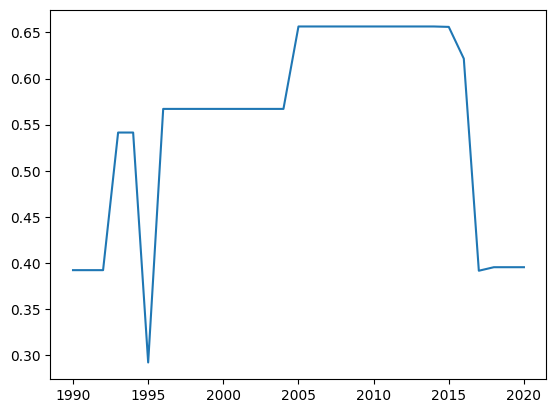

In [71]:

def plot_prob_series(country,start_year,end_year,lookback=5):
    
    sns.lineplot(x = list(range(start_year,end_year+1)),y=prob_series(country,start_year,end_year,lookback))
    
plot_prob_series('Somalia',1990,2020)




In [65]:
codes = pd.read_csv('../raw_data/country_code_example.csv')


def lambda_prob(row):
    
    prob_value = get_prob(row['Country from our model'],2021)
    
    return prob_value

code_dict = pd.Series(codes['Country from our model'].values,index=codes.Code).to_dict()

codes2 = codes[['Country from our model', 'Code']].dropna()

codes2['prob'] = codes2.apply(lambda x: lambda_prob(x),axis=1)
# codes2
# codes2['next_year_prob'] = get_prob(codes2['Country from our model'],2022)

codes2 = codes[['Country from our model', 'Code']].dropna()
codes2

,Country from our model,Code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,Angola,AGO
4,Argentina,ARG
...,...,...
170,Venezuela,VEN
171,Vietnam,VNM
172,Yemen,YEM
173,Zambia,ZMB


In [66]:

def get_year_probs(year):
    def lambda_prob(row):
    
        prob_value = get_prob(row['Country from our model'],year)
    
        return prob_value
    codes3 = codes[['Country from our model', 'Code']].dropna()
    
    codes3[year] = codes3.apply(lambda x: lambda_prob(x),axis=1)
    return codes3

get_year_probs(1990)

time_series_probs = [get_year_probs(i) for i in range(1990,2023)]


In [68]:
time_series_probs[20]

,Country from our model,Code,2010
0,Afghanistan,AFG,0.656468
1,Albania,ALB,0.741733
2,Algeria,DZA,0.646674
3,Angola,AGO,0.379188
4,Argentina,ARG,0.518064
...,...,...,...
170,Venezuela,VEN,0.470702
171,Vietnam,VNM,0.628353
172,Yemen,YEM,0.501278
173,Zambia,ZMB,0.501278


# Downloading the data

In [ ]:
csv_full['year_all'] = csv_full.apply(lambda x: get_year(x),axis=1)